In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
from dnn_face_detection import detect_face
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [2]:
img1=cv2.imread('dataset/1.jfif')
img2=cv2.imread('dataset/2.jfif')
img3=cv2.imread('dataset/3.jfif')
img4=cv2.imread('dataset/4.jfif')

In [3]:
def plot_img(img):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

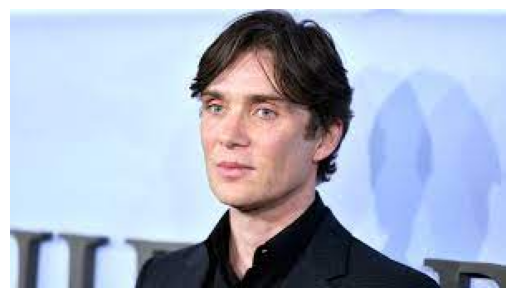

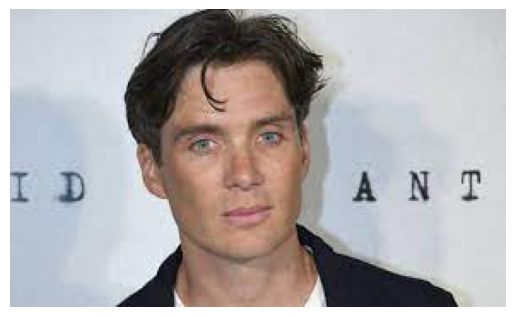

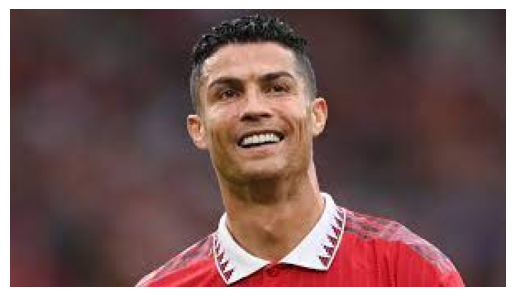

In [4]:
plot_img(img1)
plot_img(img2)
plot_img(img3)

In [5]:
def face_detection(img):
    faces = detect_face(img)
    print(faces)
    
    for bounding_box in faces:
        x = int(bounding_box[0])
        y = int(bounding_box[1])
        x2 = int(bounding_box[2])
        y2 = int(bounding_box[3])
        print(x,y,x2,y2)
        crop_face = img[y:y2,x:x2]
        crop_face = cv2.resize(crop_face,(160,160))
        return crop_face

In [6]:
img1_c=face_detection(img1)
img2_c=face_detection(img2)
img3_c=face_detection(img3)

img4_c=face_detection(img4)


[[114.75  24.78 183.72 117.83]]
114 24 183 117
[[ 85.63  29.59 171.08 143.6 ]]
85 29 171 143
[[114.63  18.01 182.79 102.44]]
114 18 182 102
[[ 36.58  51.83 135.06 176.75]]
36 51 135 176


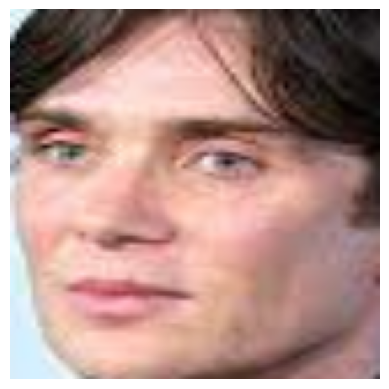

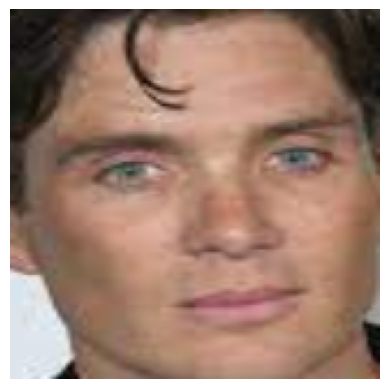

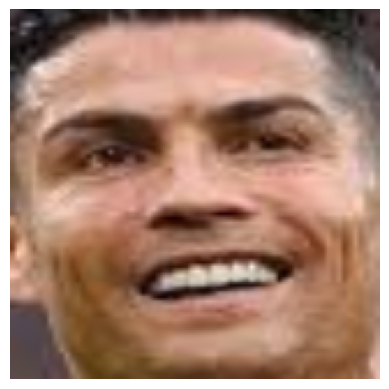

In [7]:
plot_img(img1_c)
plot_img(img2_c)
plot_img(img3_c)

<h1> INITIALIZING FaceNet </h1>

In [8]:
embedder=FaceNet()

In [9]:
embeding1=embedder.embeddings(np.expand_dims(img1_c,axis=0))
embeding2=embedder.embeddings(np.expand_dims(img2_c,axis=0))
embeding3=embedder.embeddings(np.expand_dims(img3_c,axis=0))
embeding4=embedder.embeddings(np.expand_dims(img4_c,axis=0))


1/1 [==============================] - 0s 76ms/step


In [10]:
embeding1.shape
embeding1
#plot_img(embeding1)

array([[-0.05624265, -0.08563457, -0.04019779, -0.01544771,  0.0610002 ,
         0.06173817,  0.10674384, -0.06128143, -0.04655641,  0.00340882,
        -0.00624182,  0.03639471, -0.01718152, -0.01892968, -0.00723965,
         0.09451431,  0.04472771,  0.06451372, -0.02311308,  0.04118531,
        -0.04527142, -0.07671451, -0.08529057, -0.01880304, -0.0245335 ,
        -0.04231019, -0.05346045,  0.00308966,  0.01911451, -0.00172161,
        -0.0056843 , -0.06739047, -0.02512849,  0.02384693, -0.06355324,
        -0.03795065,  0.01629538, -0.06302449, -0.00227257,  0.08689278,
        -0.02242227,  0.00497749, -0.04377219, -0.03385478,  0.06291987,
         0.05427435,  0.05805186,  0.00254576,  0.08518045,  0.03684376,
        -0.0027662 ,  0.04267708, -0.01114298,  0.00598183,  0.03397736,
        -0.04948646, -0.02183145, -0.02712078,  0.00636545,  0.04450113,
         0.00929472, -0.01628295,  0.03760002,  0.00331758, -0.08394752,
         0.01490592, -0.01671722, -0.01233139, -0.0

In [11]:
img1_c.shape


(160, 160, 3)

In [12]:
similarity_score=cosine_similarity(embeding2,embeding4)
(similarity_score)

array([[0.5615629]], dtype=float32)

In [14]:
similarity_score[0][0]

0.5615629